# Exploratory Data Analysis (EDA)

I have done all the data cleaning and formatting.  Now, I will Conduct EDA on the Self Harm and Social Media datasets to examine relationships between variables and other patterns in the data.

# Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

# Show plots inline
%matplotlib inline


In [2]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Load The Self Harm Data

In [3]:
#Load Self_harm dataset 
self_harm = ('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Self_harm_final.csv')
Self_harm = pd.read_csv(self_harm)
Self_harm.head()

,Unnamed: 0,Sex,Race/Ethnicity,Cause of Injury,Disposition,Age Group,Year,Injuries,Population
0,6,Male,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5862483
1,7,Male,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,1585658
2,8,Male,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1900490
3,9,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,518145
4,11,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5572690


In [4]:
#Load Social_media datatset
social_media = ('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Social_media_final.csv')
Social_media = pd.read_csv(social_media)
Social_media.head()

,Year,Facebook,Flickr,Friendster,Google Buzz,Google+,Hi5,Instagram,MySpace,Orkut,Pinterest,Reddit,Snapchat,TikTok,Tumblr,Twitter,WeChat,Weibo,Whatsapp,YouTube
0,2002,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,NaN,NaN,4.470000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,NaN,3.675135,5.970054,NaN,NaN,NaN,NaN,0.980036,4.900180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,NaN,7.399354,7.459742,NaN,NaN,9.73161,NaN,19.490059,9.865805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.946322
4,2006,NaN,14.949270,8.989854,NaN,NaN,19.93236,NaN,54.763260,14.966180,NaN,0.248309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.878248


Now, I want to check on my data sets to make sure they are ready for the EDA.

In [5]:
Self_harm.shape

(2631, 9)

Self_harm dataset had 8 columns but we got 9 columns here. Lets see what is the extra column we got.


In [6]:
#Call .columns on df
Self_harm.columns

Index(['Unnamed: 0', 'Sex', 'Race/Ethnicity', 'Cause of Injury', 'Disposition',
       'Age Group', 'Year', 'Injuries', 'Population'],
      dtype='object')

Column named 'Unnamed: 0' is not needed and we dont know where did it come so I will drop it.

In [7]:
#Drop the 'Unnamed: 0' column
Self_harm = Self_harm.drop(['Unnamed: 0'], axis=1)
Self_harm

,Sex,Race/Ethnicity,Cause of Injury,Disposition,Age Group,Year,Injuries,Population
0,Male,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5862483
1,Male,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,1585658
2,Male,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1900490
3,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,518145
4,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5572690
...,...,...,...,...,...,...,...,...
2626,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,85+,2018,0,116478
2627,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,85+,2018,0,3349454
2628,Female,Black,Self-harm All Injury Causes,All Cases,85+,2018,0,366329
2629,Female,Hispanic,Self-harm All Injury Causes,All Cases,85+,2018,0,304983


In [8]:
Self_harm.describe()

,Year,Injuries,Population
count,2631.000000,2631.000000,2.631000e+03
mean,2009.508932,1938.107564,2.100451e+06
std,5.182654,4791.723482,2.219766e+06
min,2001.000000,0.000000,0.000000e+00
25%,2005.000000,0.000000,5.579545e+05
50%,2010.000000,0.000000,1.356029e+06
75%,2014.000000,0.000000,2.346045e+06
max,2018.000000,41408.000000,8.220183e+06


First thing i want to see in Self_harm data set is the correlations between dependent and independent variables. 

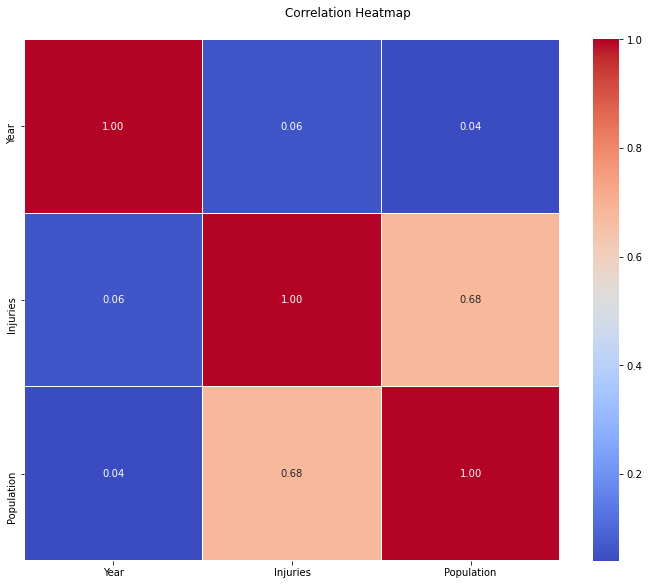

In [9]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features 
corrmat = Self_harm.corr()
fig, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
title= fig.suptitle('Correlation Heatmap', fontsize=12)


The correlation matrix, which contains a subset of only numeric variables, indicates the following notable relationships between variables:

Strong Correlation
Injuries : Population (.68)

In the dataset we do have numerical an categorical variables. In this correlation matrix we are seing only numerical ones. Our dependent variable is numarical/int but the variables i am intersted in to see the correlation with are categorical that is why i will have second correlation matrix, which contains both numerical variables and categorical variables.


In [10]:
#correlation matrix 2
#Create a correlation heatmap for looking at the correlation of all variables/features 


In [11]:
df_pivot = Self_harm.pivot_table(values='Injuries', index='Sex', columns='Age Group', aggfunc='sum')
df_pivot

Age Group,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
Sex,,,,,,,,,,,,,,,,,,
Female,0,0,243763,699443,429916,321987,293778,253976,264129,219585,179244,103123,50055,15557,0,0,0,0
Male,0,0,40324,298490,333780,261781,241057,197953,196843,187325,142347,81365,37160,6180,0,0,0,0


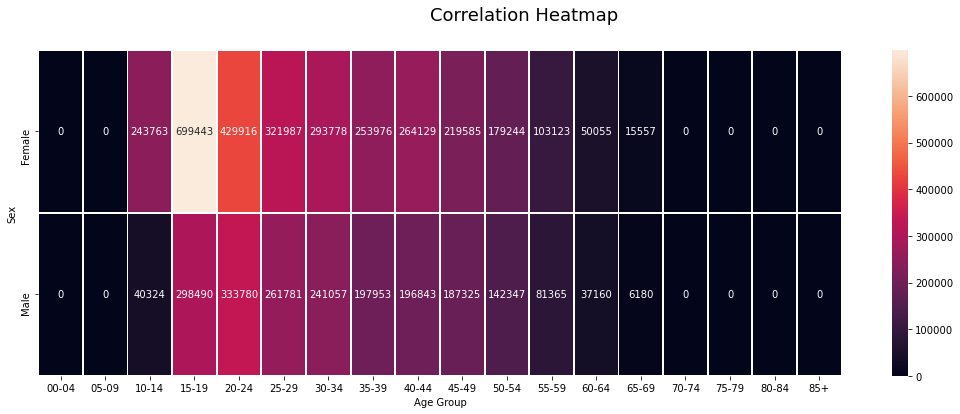

In [12]:

fig, ax = plt.subplots(figsize=(18,6)) # Sample figsize in inches
sns.heatmap(df_pivot, annot=True, fmt='d', linewidths=.9, ax=ax)
title = fig.suptitle('Correlation Heatmap', fontsize=18)

In [13]:
df_pivot_Race = Self_harm.pivot_table(values='Injuries', index='Race/Ethnicity', columns='Age Group', aggfunc='sum')
df_pivot_Race

Age Group,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
Race/Ethnicity,,,,,,,,,,,,,,,,,,
Black,0,0,26143,123331,89351,55839,38472,22461,13439,9222,3921,1949,0,0,0,0,0,0
Hispanic,0,0,2498,18559,10651,2554,1242,1321,0,0,0,0,0,0,0,0,0,0
Other Non-Hispanic,0,0,0,7738,1213,0,0,0,0,0,0,0,0,0,0,0,0,0
White Non-Hispanice,0,0,250069,784719,615397,497207,463665,421575,418070,389786,307831,179868,87215,21737,0,0,0,0


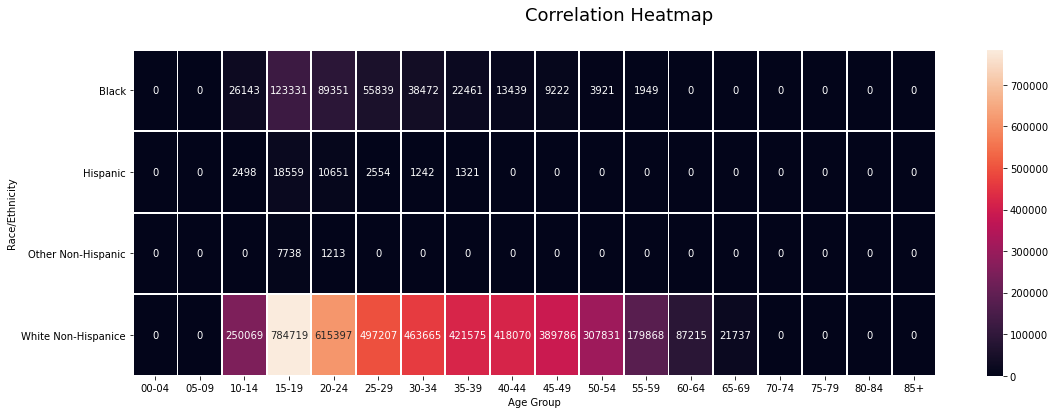

In [22]:

fig, ax = plt.subplots(figsize=(18,6)) # Sample figsize in inches
sns.heatmap(df_pivot_Race, annot=True, fmt='d', linewidths=.9, ax=ax)
title = fig.suptitle('Correlation Heatmap', fontsize=18)

First of all, I want to see the injurie difference between female and male 

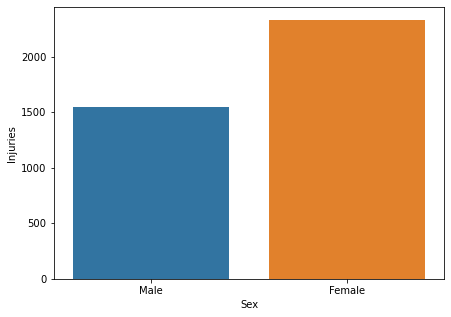

In [14]:
#Make barplot to see difference between male and female 
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot( x='Sex', y='Injuries', ci=None, data=Self_harm)
plt.show()

Now, I want to see how Injuries differs between female and male in regards to Race/Ethnicity

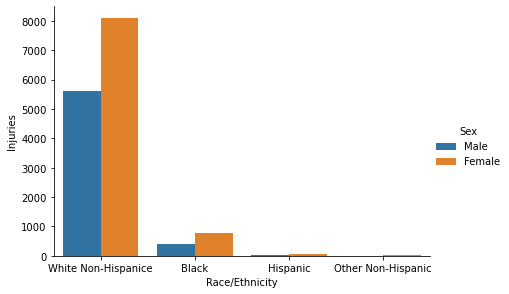

In [15]:
sns.catplot(x='Race/Ethnicity', y='Injuries', hue='Sex', kind='bar', height=4, aspect=1.5, ci=None, data=Self_harm)

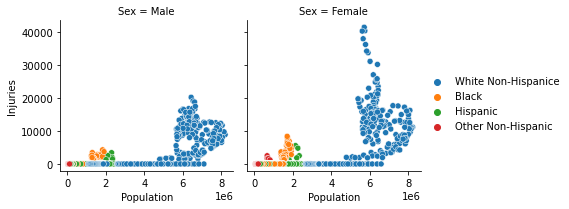

In [16]:
g = sns.FacetGrid(Self_harm, col="Sex" )
g.map_dataframe(sns.scatterplot, x="Population", y="Injuries", hue="Race/Ethnicity")
g.set_axis_labels("Population", "Injuries")
g.add_legend()

Now, I want to see how Injuries differs between female and male in regards to Age group.

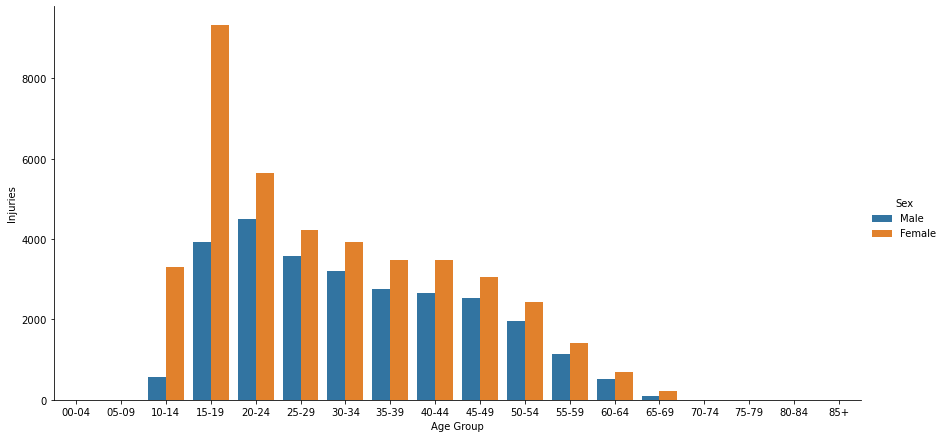

In [17]:
sns.catplot(x='Age Group', y='Injuries', hue='Sex', kind='bar', height=6, aspect=2, ci=None, data=Self_harm)

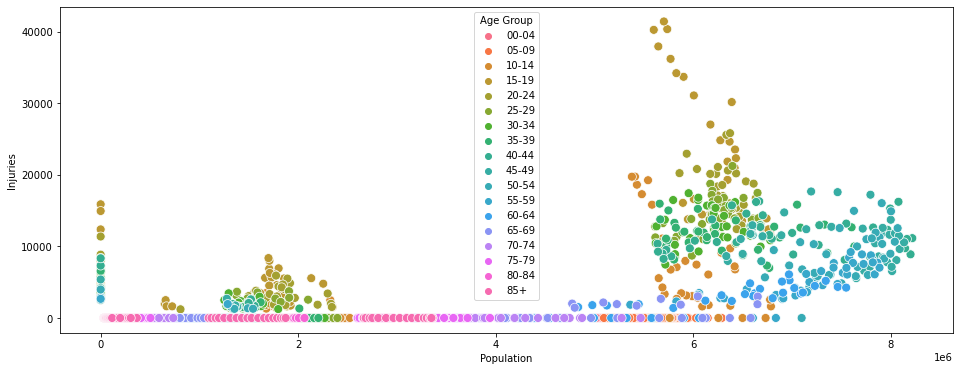

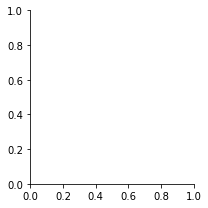

In [18]:
g, ax = plt.subplots(figsize=(16,6))
g = sns.FacetGrid(Self_harm)
g.map_dataframe(sns.scatterplot, x="Population", y="Injuries", hue="Age Group", s=80, ax=ax)

In [19]:
Self_harm['notinjured']=((Self_harm['Population']-Self_harm['Injuries'])/ Self_harm['Population'])*100
Self_harm

,Sex,Race/Ethnicity,Cause of Injury,Disposition,Age Group,Year,Injuries,Population,notinjured
0,Male,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5862483,100.0
1,Male,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,1585658,100.0
2,Male,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1900490,100.0
3,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,518145,100.0
4,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5572690,100.0
...,...,...,...,...,...,...,...,...,...
2626,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,85+,2018,0,116478,100.0
2627,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,85+,2018,0,3349454,100.0
2628,Female,Black,Self-harm All Injury Causes,All Cases,85+,2018,0,366329,100.0
2629,Female,Hispanic,Self-harm All Injury Causes,All Cases,85+,2018,0,304983,100.0


In [20]:
Self_harm['%'] = Self_harm['Injuries']/Self_harm['Population']
Self_harm

,Sex,Race/Ethnicity,Cause of Injury,Disposition,Age Group,Year,Injuries,Population,notinjured,%
0,Male,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5862483,100.0,0.0
1,Male,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,1585658,100.0,0.0
2,Male,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1900490,100.0,0.0
3,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,518145,100.0,0.0
4,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5572690,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2626,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,85+,2018,0,116478,100.0,0.0
2627,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,85+,2018,0,3349454,100.0,0.0
2628,Female,Black,Self-harm All Injury Causes,All Cases,85+,2018,0,366329,100.0,0.0
2629,Female,Hispanic,Self-harm All Injury Causes,All Cases,85+,2018,0,304983,100.0,0.0


In [21]:
df_pivot = Self_harm.pivot_table(values='notinjured', index='Sex', columns='Age Group')
df_pivot

Age Group,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
Sex,,,,,,,,,,,,,,,,,,
Female,100.0,100.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,99.958693,-inf,-inf,99.989841,99.996191,100.0,100.0,100.0,100.0
Male,100.0,100.0,99.990668,-inf,-inf,-inf,-inf,99.947131,-inf,-inf,-inf,99.982525,99.992042,99.998450,100.0,100.0,100.0,100.0
